In [1]:
#This program computes The Kullbeck-Leibler Divergence between Fitted-compounds and Q-measure which is driven from Gaussian mixutre model 

from __future__ import print_function
import pandas as pd
import numpy as np
import scipy as sp
from itertools import chain
import scipy.optimize as opt
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, entropy, ks_2samp

MAX_ENTROPY_ALLOWED = 1e5

gmm_pdf=pd.read_csv('gmm_pdf.csv' ) #Load pdf data from GMM
gmm_pdf.fillna(0, inplace = True)
gmm_pdf.isnull().values.any

data=pd.read_csv('10003+10003-4.csv' ) #Input Dataset
data.fillna(0, inplace = True)        #Replace "NaN" into 0 value
data.isnull().values.any

Q64_pdf = gmm_pdf.iloc[:, 0].values
Q10003_pdf = gmm_pdf.iloc[:, 1].values


In [2]:
#Variable Declaration(Use Dictionary datatype for each compounds)
mu = {}               
sigma = {}
compounds={}
KLDQ64 = {}
KLDQ10003 = {}
names = list(data)               #extract the name of each compound(first column)
names.remove('Unnamed: 0')    
x = np.linspace(0,2,100)     #X-axis 
pdf_norm_i = {}             #normal pdf

In [3]:
#The loop for Computing K-L Divergence 
#Each column of data : Fitted into normal distribution 
#We calaulate the minimum entropy between fitted distribution and gaussian mixture pdf

for i in range(1, 13958):              #1 to 13957
    compounds[i]=data.iloc [:, i].values
    mu[i], sigma[i] = norm.fit(compounds[i])
    pdf_norm_i[i] = norm.pdf(x, mu[i], sigma[i])
    #KLDQ19[i] = min(MAX_ENTROPY_ALLOWED, entropy(pdf_norm_i[i], Q19_pdf))           
    KLDQ64[i] = min(MAX_ENTROPY_ALLOWED, entropy(pdf_norm_i[i], Q64_pdf))
    #KLDQ126[i] = min(MAX_ENTROPY_ALLOWED, entropy(pdf_norm_i[i], Q126_pdf))
    KLDQ10003[i] = min(MAX_ENTROPY_ALLOWED, entropy(pdf_norm_i[i], Q10003_pdf))

In [4]:
parameters = pd.DataFrame(data = [mu, sigma, KLDQ64, KLDQ10003], index = ['mu', 'sigma', 'KLDQ64', 'KLDQ10003'])
parameters.columns = names     # put the name of the columns on the dataframe
parameters

,omega_1_0,omega_1_0.1,omega_1_0.2,omega_1_0.3,omega_1_0.4,omega_1_0.5,omega_1_0.6,omega_1_0.7,omega_1_0.8,omega_1_0.9,...,omega_1182_0.9,omega_1182_0.10,omega_1182_0.11,omega_1182_0.12,omega_1182_0.13,omega_1182_0.14,omega_1182_0.15,omega_1182_0.16,omega_1182_0.17,omega_1182_0.18
mu,0.510488,0.507696,0.510188,0.512069,0.510507,0.515161,0.509230,0.511363,0.507681,0.509815,...,0.494820,0.500740,0.481204,0.475274,0.495921,0.506620,0.512098,0.473487,0.479261,0.481332
sigma,0.163532,0.160331,0.162671,0.162932,0.158961,0.156074,0.158686,0.161168,0.163183,0.155727,...,0.109670,0.112888,0.104113,0.095959,0.109310,0.115209,0.117592,0.086655,0.098433,0.107523
KLDQ64,0.411690,0.417022,0.410087,0.399224,0.393595,0.353965,0.400801,0.396612,0.428400,0.386413,...,0.448221,0.399234,0.569901,0.649428,0.440724,0.355301,0.316880,0.712090,0.605106,0.560008
KLDQ10003,0.101408,0.085697,0.098178,0.103752,0.089073,0.094554,0.085208,0.097006,0.093501,0.079714,...,0.059733,0.061416,0.061508,0.093455,0.062671,0.068329,0.076699,0.147320,0.084018,0.049451


In [5]:
parameters.to_csv( "KLD10003+10003.csv", sep=',', encoding='utf-8')     #Save into a CSV file

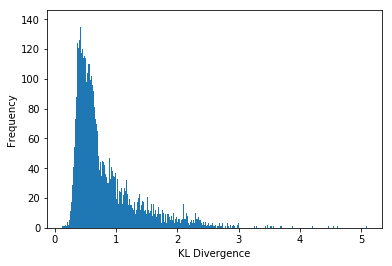

In [6]:
KLD_Hist1 = np.array(list(chain(KLDQ64.values())))    #Q19
plt.hist(KLD_Hist1, bins = 1000)
plt.xlabel('KL Divergence')
plt.ylabel('Frequency')
plt.savefig('10003+10003_KLD from Q64.png')
plt.show()

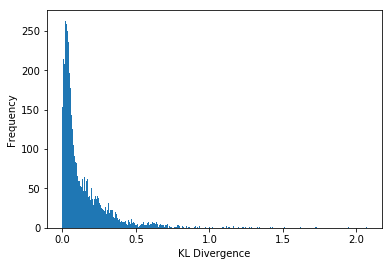

In [7]:
KLD_Hist2 = np.array(list(chain(KLDQ10003.values())))    #Q10003
plt.hist(KLD_Hist2, bins = 1000)
plt.xlabel('KL Divergence')
plt.ylabel('Frequency')
plt.savefig('10003+10003_KLD from Q10003.png')
plt.show()